# Generating bond graph models from chemical reactions
Manually creating components and connecting them can be cumbersome. An alternative method of generating bond graph models of biochemical networks is to use the Reaction Builder module in BondGraphTools. We first import this module (as well as other necessary modules).

In [1]:
from BondGraphTools import reaction_builder
from BondGraphTools.reaction_builder import Reaction_Network

from BondGraphTools import draw, simulate
from numpy import log
import matplotlib.pyplot as plt
from sympy import init_printing
init_printing()

We define the reactions as follows. Reaction Builder interprets a string for each reaction. Reactions can also be assigned names.

In [2]:
rn_MM = Reaction_Network(name='Michaelis-Menten enzyme',temperature=310)
rn_MM.add_reaction('E + S = C', name='R1')
rn_MM.add_reaction('C = E + P', name='R2')

We will also add chemostats to indicate that the substrate and product are held at constant concentrations.

In [3]:
rn_MM.add_chemostat('S')
rn_MM.add_chemostat('P')

The `rn_MM` variable contains the necessary information about the network, including the species:

In [4]:
rn_MM.species

['E', 'S', 'C', 'P']

the reactions:

In [5]:
rn_MM._reactions

{'R1': ({'E': 1, 'S': 1}, {'C': 1}, None, None),
 'R2': ({'C': 1}, {'E': 1, 'P': 1}, None, None)}

and stoichiometry:

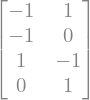

In [6]:
rn_MM.stoichiometry

We will now use this reaction network to generate a bond graph.

In [7]:
model_MM_rn = rn_MM.as_network_model()

The structure of the reaction network is the same as above.

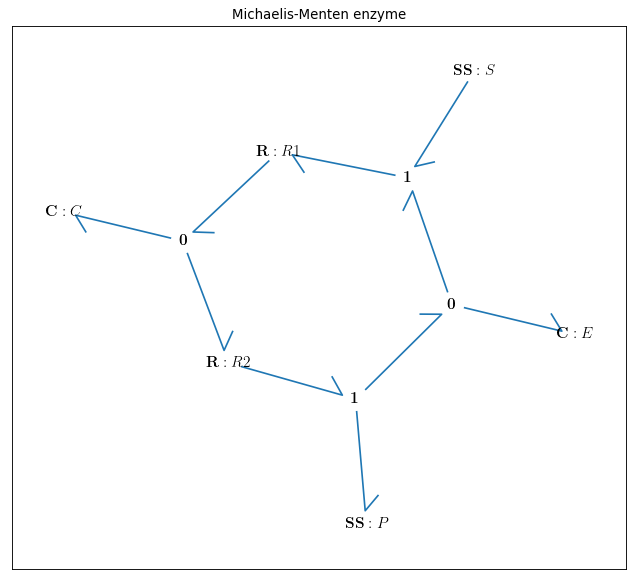

In [8]:
draw(model_MM_rn)

Also note that because we did not explicitly create bond graph components for the reaction and species, they need to be found within the new model. BondGraphTools provides a universal resource identifier (URI) interface for accessing the components within a model. For example, the C:E component can be accessed using the identifier below:

In [9]:
model_MM_rn/"C:E"

C: E

The constitutive equations also have the same linear form. The exponent below arises from the non-unity value of the $RT$ constant.

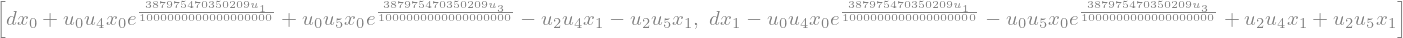

In [10]:
model_MM_rn.constitutive_relations

The state and control variables are defined below:

In [11]:
model_MM_rn.state_vars

{'x_0': (C: E, 'q_0'), 'x_1': (C: C, 'q_0')}

In [12]:
model_MM_rn.control_vars

{'u_0': (C: E, 'k'),
 'u_1': (SS: S, 'e'),
 'u_2': (C: C, 'k'),
 'u_3': (SS: P, 'e'),
 'u_4': (R: R1, 'r'),
 'u_5': (R: R2, 'r')}

As seen above, the parameters for each species and reaction are control variables that can be set. As before, we set the values to 1.

In [13]:
(model_MM_rn/"C:E").set_param('k',1)
(model_MM_rn/"C:C").set_param('k',1)
(model_MM_rn/"R:R1").set_param('r',1)
(model_MM_rn/"R:R2").set_param('r',1)

We also set the values of the chemostats using the chemical potential equation

In [14]:
R = reaction_builder.R
T = 310
K_S = 1
K_P = 1
x_S = 2
x_P = 1
(model_MM_rn/"SS:S").set_param('e',R*T*log(K_S*x_S))
(model_MM_rn/"SS:P").set_param('e',R*T*log(K_P*x_P))

If we now show the equations of the system, we retrieve the familiar mass action equations.

In [15]:
model_MM_rn.constitutive_relations

These equations can be simulated as follows.

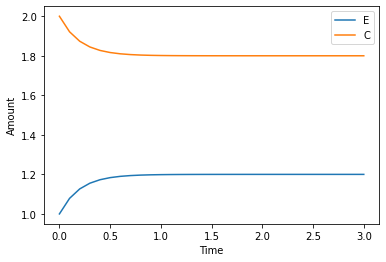

In [16]:
t,x = simulate(model_MM_rn, timespan=(0.,3.), x0=[1,2])
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(['E','C'])
plt.show()